In [34]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data_dir = '/analysis/shikhar/abcd_npc/img_dt/'
data_loc = 'all_volumetrix_processed.csv'

In [17]:
# trainVal_y = pd.read_csv(data_dir+data_y_loc, index_col=False)
all_x = pd.read_csv(data_dir+data_loc, index_col=False)
# all_xy = 

train_y = all_x[all_x['sample']=='train']['residual_fluid_intelligence_score'].values
train_x= all_x[all_x['sample']=='train']

val_internal_x= all_x[all_x['sample']=='val_internal']
val_internal_y = all_x[all_x['sample']=='val_internal']['residual_fluid_intelligence_score'].values

val_x= all_x[all_x['sample']=='val']
val_y = all_x[all_x['sample']=='val']['residual_fluid_intelligence_score'].values
cols_asIDV = train_x.columns.difference(['SUBJECTKEY','STUDY_COHORT_NAME','sample','residual_fluid_intelligence_score'])

In [18]:
## setting up MSE as Loss function

mse_loss = make_scorer(mean_squared_error,greater_is_better=False)

# Building models
---
##  1. SVR - 1st attempt

In [19]:
## Defining parameters for grid search
parameters = {'kernel':('linear', 'rbf'), 'gamma':('auto','scale'), 'C':[0.1,1, 10],'epsilon':[0.01,0.1,1]}
#parameters = {'kernel':('linear', 'rbf'), 'C':[1]}
svr = SVR()
reg_svr = GridSearchCV(svr, parameters, cv=3,scoring = mse_loss,n_jobs=10)
print(reg_svr.fit(train_x[cols_asIDV], train_y))
print("\n\n ################ Output on best model ############### \n")
print("Best cv MSE: ",(-1*reg_svr.best_score_))
print("Best cv Model: ",(reg_svr.best_estimator_),"\n")
print("val_internal MSE: ",mean_squared_error(reg_svr.predict(val_internal_x[cols_asIDV]),val_internal_y))  
print("val MSE: ",mean_squared_error(reg_svr.predict(val_x[cols_asIDV]),val_y)) 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'kernel': ('linear', 'rbf'), 'gamma': ('auto', 'scale'), 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)


 ################ Output on best model ############### 

Best cv MSE:  85.61746236560562
Best cv Model:  SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

val_internal MSE:  83.42297160635904
val MSE:  72.19715689904486


---
##  1. SVR - 2nd attempt

In [21]:
parameters = {'kernel':('linear', 'rbf'), 'gamma':('auto','scale'), 'C':[0.5,1,2,5,10],\
              'epsilon':[0.5,1,2,5,10]}
svr = SVR()
reg_svr1 = GridSearchCV(svr, parameters, cv=3,scoring = mse_loss,n_jobs=10)
reg_svr1.fit(train_x[cols_asIDV], train_y)
print("\n\n ################ Output on best model ############### \n")
print("Best cv MSE: ",(-1*reg_svr1.best_score_))
print("Best cv Model: ",(reg_svr1.best_estimator_),"\n")
print("val_internal MSE: ",mean_squared_error(reg_svr1.predict(val_internal_x[cols_asIDV]),val_internal_y))  
print("val MSE: ",mean_squared_error(reg_svr1.predict(val_x[cols_asIDV]),val_y)) 



 ################ Output on best model ############### 

Best cv MSE:  85.43849815995871
Best cv Model:  SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=10, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

val_internal MSE:  83.05155497355766
val MSE:  71.54807214572764


---
##  1. SVR - 3rd attempt

In [22]:
parameters = {'kernel':('linear', 'rbf'), 'gamma':('auto','scale'), 'C':[0.5,1,2],'epsilon':[8,10,15,20]}
svr = SVR()
reg_svr2 = GridSearchCV(svr, parameters, cv=3,scoring = mse_loss,n_jobs=10)
reg_svr2.fit(train_x[cols_asIDV], train_y)
print("\n\n ################ Output on best model ############### \n")
print("Best cv MSE: ",(-1*reg_svr2.best_score_))
print("Best cv Model: ",(reg_svr2.best_estimator_),"\n")
print("val_internal MSE: ",mean_squared_error(reg_svr2.predict(val_internal_x[cols_asIDV]),val_internal_y))  
print("val MSE: ",mean_squared_error(reg_svr2.predict(val_x[cols_asIDV]),val_y)) 



 ################ Output on best model ############### 

Best cv MSE:  85.43849815995871
Best cv Model:  SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=10, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

val_internal MSE:  83.05155497355766
val MSE:  71.54807214572764


In [23]:
# saving svr best model
reg_svr_best = reg_svr2

---
## 2. RF - 1st attempt

In [24]:
parameters = {'max_depth':[2,4,5], 'min_samples_split':(500,100,50), 'n_estimators':(50,100,500),\
              'max_features':('auto','sqrt','log2')}

rf = RandomForestRegressor(random_state=243,n_jobs=2)
reg_rf = GridSearchCV(rf, parameters, cv=3,scoring = mse_loss,n_jobs=10)
reg_rf.fit(train_x[cols_asIDV], train_y)
print("\n\n ################ Output on best model ############### \n")
print("Best cv MSE: ",(-1*reg_rf.best_score_))
print("Best cv Model: ",(reg_rf.best_estimator_),"\n")
print("val_internal MSE: ",mean_squared_error(reg_rf.predict(val_internal_x[cols_asIDV]),val_internal_y))  
print("val MSE: ",mean_squared_error(reg_rf.predict(val_x[cols_asIDV]),val_y)) 



 ################ Output on best model ############### 

Best cv MSE:  85.18357014508894
Best cv Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=50,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=243, verbose=0, warm_start=False) 

val_internal MSE:  83.65451573810371
val MSE:  71.3494286362827


## 2. RF - 2nd attempt

In [25]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':(80,50,30), 'n_estimators':(30,50,100,150),\
              'max_features':('auto','sqrt','log2')}

rf = RandomForestRegressor(random_state=243,n_jobs=2)
reg_rf1 = GridSearchCV(rf, parameters, cv=3,scoring = mse_loss,n_jobs=10)
reg_rf1.fit(train_x[cols_asIDV], train_y)
print("\n\n ################ Output on best model ############### \n")
print("Best cv MSE: ",(-1*reg_rf1.best_score_))
print("Best cv Model: ",(reg_rf1.best_estimator_),"\n")
print("val_internal MSE: ",mean_squared_error(reg_rf1.predict(val_internal_x[cols_asIDV]),val_internal_y))  
print("val MSE: ",mean_squared_error(reg_rf1.predict(val_x[cols_asIDV]),val_y)) 



 ################ Output on best model ############### 

Best cv MSE:  85.23054425456871
Best cv Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=80,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
           oob_score=False, random_state=243, verbose=0, warm_start=False) 

val_internal MSE:  86.0500038354376
val MSE:  71.51153988610088


## 2. RF - 3rd attempt

In [26]:
parameters = { 'min_samples_split':(80,50,30), 'n_estimators':(10,20,30,40)}

rf = RandomForestRegressor(max_depth=2,max_features='sqrt',random_state=243,n_jobs=2)
reg_rf2 = GridSearchCV(rf, parameters, cv=3,scoring = mse_loss,n_jobs=10)
reg_rf2.fit(train_x[cols_asIDV], train_y)
print("\n\n ################ Output on best model ############### \n")
print("Best cv MSE: ",(-1*reg_rf2.best_score_))
print("Best cv Model: ",(reg_rf2.best_estimator_),"\n")
print("val_internal MSE: ",mean_squared_error(reg_rf2.predict(val_internal_x[cols_asIDV]),val_internal_y))  
print("val MSE: ",mean_squared_error(reg_rf2.predict(val_x[cols_asIDV]),val_y)) 



 ################ Output on best model ############### 

Best cv MSE:  85.36621009666739
Best cv Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=80,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
           oob_score=False, random_state=243, verbose=0, warm_start=False) 

val_internal MSE:  84.31022324867887
val MSE:  71.76886474309214


In [28]:
# saving svr best model
reg_rf_best = reg_rf

---
### Error Analysis on the hold out data (to be used for ensemble)

In [29]:
all_x['score_predicted_svr'] = reg_svr2.predict(all_x[cols_asIDV])
all_x['score_predicted_rf'] = reg_rf.predict(all_x[cols_asIDV])

In [32]:
all_x['squaredError_svr'] =  all_x.apply(lambda row: (row.score_predicted_svr - row.residual_fluid_intelligence_score)**2, axis=1)
all_x['squaredError_rf'] =  all_x.apply(lambda row: (row.score_predicted_rf - row.residual_fluid_intelligence_score)**2, axis=1)

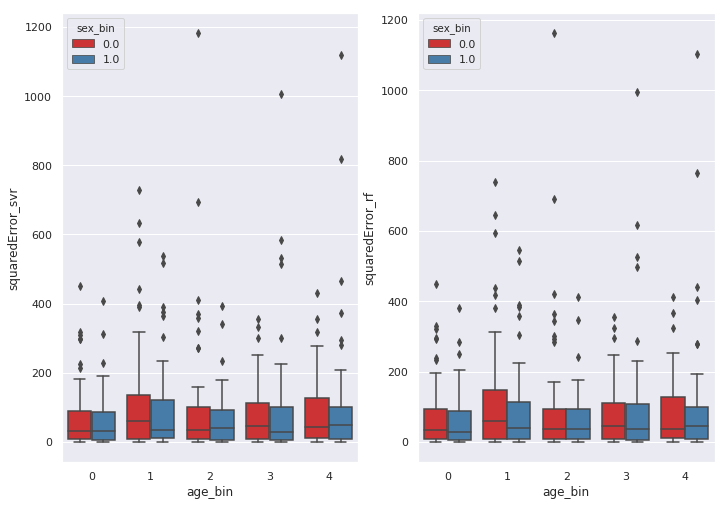

In [56]:
#On Age and sex
# 0 is male, 1 is female
all_x['age_bin']=pd.qcut(all_x['INTERVIEW_AGE'], 5, labels=list(range(0,5)))

val_ensemble = all_x[all_x['sample']=='val_forEnsemble']
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax =plt.subplots(1,2)
sns.boxplot(x="age_bin", y="squaredError_svr", hue="sex_bin", data=val_ensemble, palette="Set1", ax=ax[0])
sns.boxplot(x="age_bin", y="squaredError_rf", hue="sex_bin", data=val_ensemble, palette="Set1", ax=ax[1])
fig.show()

# # sns.boxplot(x="age_bin", y="squaredError_svr", hue="sex_bin", data=all_x, palette="Set1")

# sns.boxplot(x="age_bin", y="squaredError_rf", hue="sex_bin", data=all_x, palette="Set1")


# print(svr)
# print(rf)

In [44]:
all_x[all_x['squaredError_rf']>1000]z

,INTERVIEW_AGE,SRI24AMYGDALALGM,SRI24AMYGDALARGM,SRI24ANGULARLGM,SRI24ANGULARRGM,SRI24CALCARINELGM,SRI24CALCARINERGM,SRI24CAUDATELGM,SRI24CAUDATERGM,SRI24CBLMHEMIWHTLWM,...,SRI24WM400WM400LWM,STUDY_COHORT_NAME,SUBJECTKEY,sex_bin,residual_fluid_intelligence_score,sample,score_predicted_svr,score_predicted_rf,squaredError_svr,squaredError_rf
335,0.500000,0.410613,0.428565,0.5488,0.503562,0.266351,0.376502,0.408154,0.402718,0.526012,...,0.463292,ABCD NP Challenge 2019 Training Set,NDAR_INV86X5Z1TX,0.0,-33.488807,val_forEnsemble,0.890121,0.607267,1181.910703,1162.542313
885,0.961538,0.533737,0.587006,0.3300,0.231435,0.377360,0.405787,0.383917,0.400832,0.488209,...,0.275688,ABCD NP Challenge 2019 Training Set,NDAR_INV019DXLU4,1.0,-33.168270,val_forEnsemble,0.261310,0.062560,1117.536866,1104.288108


In [60]:
svr_score = all_x['score_predicted_svr']
rf_score = all_x['score_predicted_rf']
svr_20PList = [(round(n, 3)) for n in [min(svr_score),svr_score.quantile(0.20),svr_score.quantile(0.40),\
    svr_score.quantile(0.60),svr_score.quantile(0.80),max(svr_score)]]
rf_20PList =[(round(n, 3)) for n in [min(rf_score),rf_score.quantile(0.20),rf_score.quantile(0.40),\
    rf_score.quantile(0.60),rf_score.quantile(0.80),max(rf_score)]]
print("20% percentile of SVR scores \n",svr_20PList,"\n")
print("20% percentile of RF scores \n",rf_20PList,"\n")

20% percentile of SVR scores 
 [-1.731, -0.255, 0.023, 0.273, 0.545, 1.749] 

20% percentile of RF scores 
 [-8.484, -0.345, -0.026, 0.221, 0.501, 2.44] 

